In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from subprocess import call

In [12]:
data = datasets.load_wine()
dataset = pd.DataFrame(data.data, columns = data.feature_names)
print(f'Examples : {dataset.shape[0]}  and  Features : {dataset.shape[1]}')

print("features :- ",data.feature_names)
print("Labels :- ",data.target_names)

Examples : 178  and  Features : 13
features :-  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels :-  ['class_0' 'class_1' 'class_2']


In [15]:
x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.20,random_state = 77)


In [16]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 10)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#Testing
y_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score  :  ', accuracy)

conf_matrix = confusion_matrix  (y_test, y_pred)
print('\nConfusion matrix  :  \n', conf_matrix)

precision = precision_score(y_test, y_pred, average = None)
print('\nPrecision Score  :  ', precision)

recall  = recall_score(y_test, y_pred, average = None)
print('\nRecall Score  :  ', recall)

Accuracy Score  :   0.9166666666666666

Confusion matrix  :  
 [[10  1  0]
 [ 1 13  0]
 [ 0  1 10]]

Precision Score  :   [0.90909091 0.86666667 1.        ]

Recall Score  :   [0.90909091 0.92857143 0.90909091]


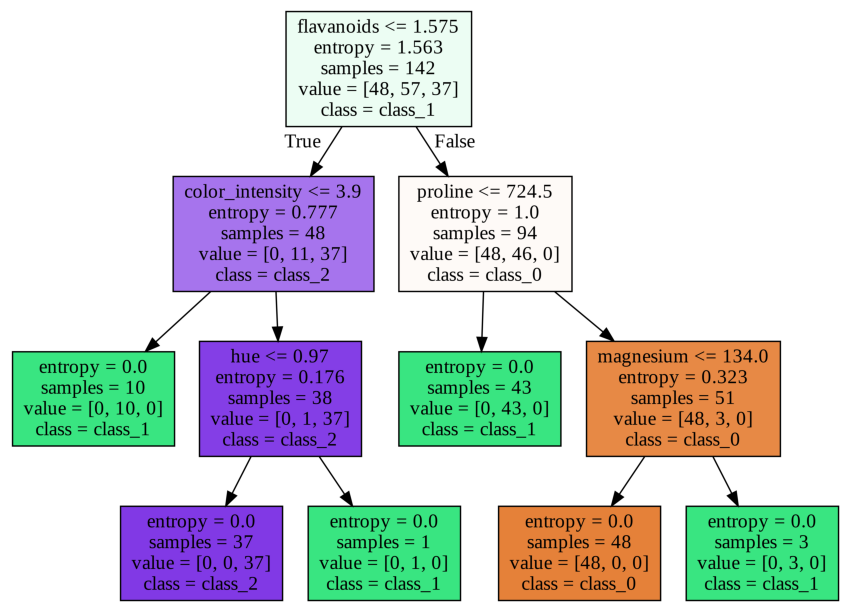

In [18]:
export_graphviz(dtc, out_file = 'wine_tree.dot', 
                feature_names = list(data.feature_names), 
                class_names = list(data.target_names), 
                filled = True)  

# Convert to png
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])
plt.figure(figsize = (15, 20))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()

In [20]:
#Task 2: Apply algorithm on digits dataset - LabelEncoding of features: and Train test Division 80%-20%
digits = datasets.load_digits()
print(digits)

print("\n================================\n")
print(digits.data.shape)
print(digits.target.shape)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [21]:
x = digits.data
y = digits.target

#splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 77)

#creating a decision tree classifier using gini
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 77, max_depth = 7, min_samples_leaf = 26)
classifier.fit(x_train, y_train)

#predicting classes of test data
y_pred = classifier.predict(x_test)
print('Predicted values  :  \n')
print(y_pred)

Predicted values  :  

[5 4 4 4 9 4 0 1 2 6 3 4 6 0 5 0 8 5 8 7 5 2 0 6 6 8 1 1 5 8 5 8 8 7 1 5 7
 1 3 3 1 9 4 7 5 6 1 3 7 1 6 1 6 3 1 6 1 1 5 9 5 0 4 2 0 6 3 7 2 0 2 2 6 1
 4 2 9 2 3 4 7 2 7 6 7 3 4 7 6 7 5 2 0 3 3 2 6 5 1 9 0 7 8 1 4 6 9 0 1 2 7
 1 0 6 5 7 4 6 7 6 3 9 7 7 1 3 7 9 9 9 2 9 5 3 4 0 6 8 6 9 3 9 2 4 8 0 6 7
 1 7 6 8 1 7 7 9 8 7 3 9 7 2 1 8 8 2 0 7 4 6 8 9 1 5 6 9 4 1 0 2 8 2 7 3 7
 9 0 0 0 8 5 4 5 1 6 5 9 5 3 7 8 2 3 7 4 4 6 3 5 4 3 2 7 7 1 3 3 0 3 5 8 5
 1 5 9 2 6 9 0 0 4 1 3 9 4 6 2 1 6 7 8 0 4 0 0 9 0 1 1 8 7 3 2 6 8 1 0 5 4
 0 5 5 1 4 4 7 9 9 9 1 7 2 0 9 1 4 1 9 5 1 4 2 7 9 9 4 6 8 0 2 8 8 9 2 6 1
 9 8 1 4 0 0 0 2 9 9 9 4 1 8 9 1 8 5 6 1 5 8 9 3 7 1 8 9 4 0 6 9 9 0 3 8 4
 2 1 1 4 8 9 6 0 5 4 4 7 4 5 1 4 8 2 8 1 1 1 2 0 4 1 3]


In [23]:
#model accuracy

print('confusion matrix :  \n', metrics.confusion_matrix(y_test, y_pred))
print('\nAccuracy :  ', metrics.accuracy_score(y_test, y_pred))
print('\nReport :  ', metrics.classification_report(y_test, y_pred))

confusion matrix :  
 [[30  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  1  3  0  0  2  1  5]
 [ 0  5 22  0  0  0  2  0  5  0]
 [ 0  2  4 25  0  0  0  2  1  1]
 [ 0  2  1  0 32  1  0  1  2  4]
 [ 2  0  0  0  1 28  0  0  0  1]
 [ 2  0  0  0  2  1 32  0  0  1]
 [ 0  0  3  0  0  0  0 32  0  3]
 [ 0  4  1  0  0  1  0  0 20  1]
 [ 2  0  0  2  0  0  0  1  4 25]]

Accuracy :   0.7833333333333333

Report :                 precision    recall  f1-score   support

           0       0.83      0.97      0.90        31
           1       0.73      0.75      0.74        48
           2       0.71      0.65      0.68        34
           3       0.89      0.71      0.79        35
           4       0.82      0.74      0.78        43
           5       0.90      0.88      0.89        32
           6       0.94      0.84      0.89        38
           7       0.84      0.84      0.84        38
           8       0.61      0.74      0.67        27
           9       0.61      0.74      0.67        34

    ac

Confusion Matrix  :  
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  1  3  0  0  2  1  5]
 [ 0  5 22  0  0  0  2  0  5  0]
 [ 0  2  4 25  0  0  0  2  1  1]
 [ 0  2  1  0 32  1  0  1  2  4]
 [ 2  0  0  0  1 28  0  0  0  1]
 [ 2  0  0  0  2  1 32  0  0  1]
 [ 0  0  3  0  0  0  0 32  0  3]
 [ 0  4  1  0  0  1  0  0 20  1]
 [ 2  0  0  2  0  0  0  1  4 25]]


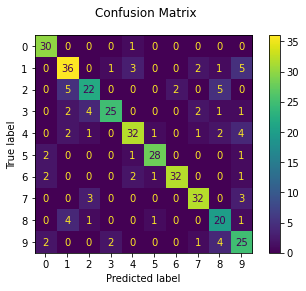

In [24]:
display = metrics.plot_confusion_matrix(classifier, x_test, y_test)
display.figure_.suptitle('Confusion Matrix')
print(f'Confusion Matrix  :  \n{display.confusion_matrix}')

plt.show()